In [1]:
import fitsio
%matplotlib inline
import sys
sys.path.append('/Users/vipasu/Dropbox/Research/addgals/code_for_addgals')
from routines import * 

/usr/local/lib/python2.7/site-packages/pandas/io/excel.py:626: UserWarning: Installed openpyxl is not supported at this time. Use >=1.6.1 and <2.0.0.
  .format(openpyxl_compat.start_ver, openpyxl_compat.stop_ver))


In [2]:
##################################################
# read data
d0 = fits_to_pandas(fitsio.read('Becker_CAM_mock.fits', lower=True))
box_size = 250.0    
np.random.seed(111)
# load previously computed distances
densities = pd.read_csv('environment_proxies.csv')


In [3]:
densities.columns

Index([u'$R_{hill_{mass}}$', u'$R_{hill}$', u'$\Sigma_{10}$', u'$\Sigma_{1}$', u'$\Sigma_{2}$', u'$\Sigma_{5}$', u'$\Sigma_{mass}$'], dtype='object')

In [4]:
d = d0
d['host_dist'] = densities['$\Sigma_{mass}$'].values
d['rhill_mass'] = densities['$R_{hill_{mass}}$'].values
d_train, d_test = split_octant(d, box_size)

-13.0022602081 -8.60770988464


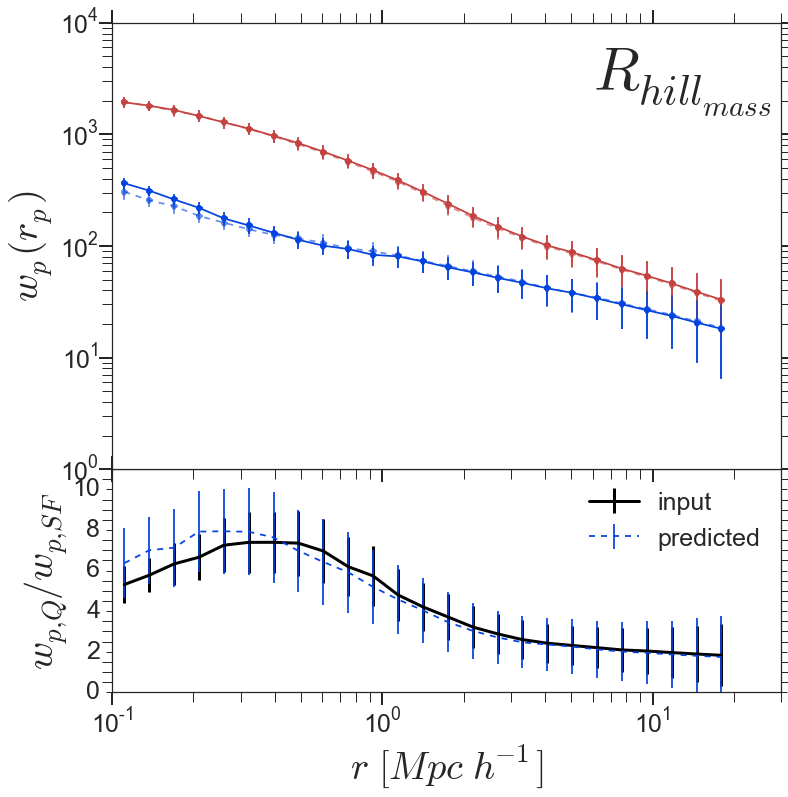

In [5]:
features = ['rhill_mass', 'mstar']
#Xtrain, ytrain, x_scaler, y_scaler = select_features(features, d_train, scaled=True)
Xtrain, ytrain = select_features(features, d_train, scaled=False)

Xtest, ytest = select_features(features, d_test, scaled=False)
#Xtest, ytest = x_scaler.transform(Xtest), y_scaler.transform(ytest)
model = DecisionTreeRegressor()
model.fit(Xtrain, ytrain)

y_hat = model.predict(Xtest)
#y_hat = y_scaler.inverse_transform(y_hat_scaled)
d_test['pred'] = y_hat
print min(y_hat), max(y_hat)
#with yaxis autoticker
correlation_ratio(d_test, '$R_{hill_{mass}}$')

[-13, -9]
Explained variance score is:  0.177059982273


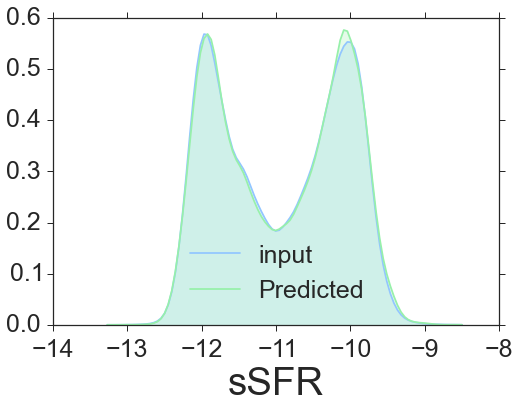

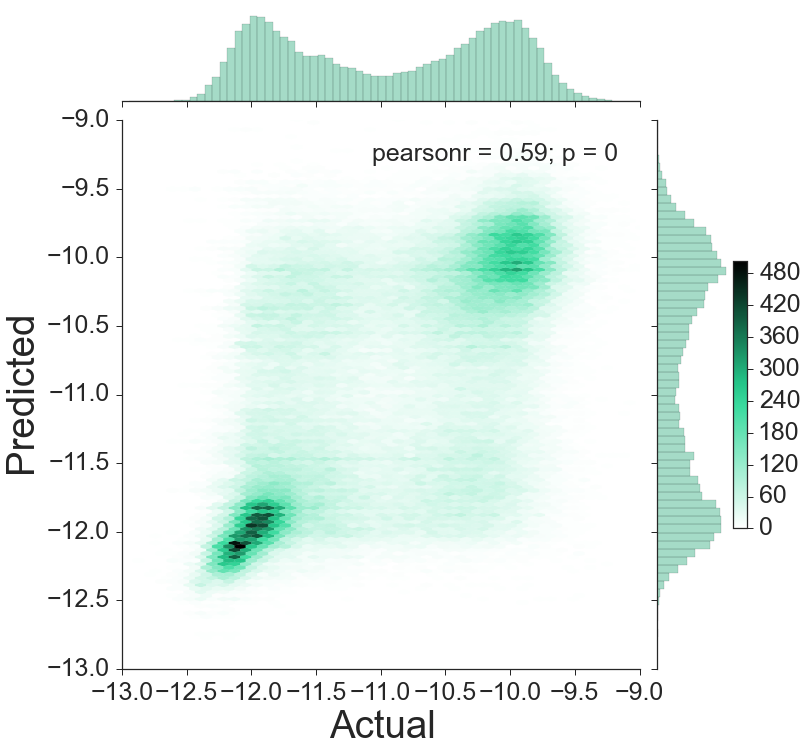

In [7]:
sample_model(model, 'recreate test', Xtrain, ytrain, Xtest, ytest, -1)

#parameters on the single tree

In [8]:
from sklearn.cross_validation import cross_val_score

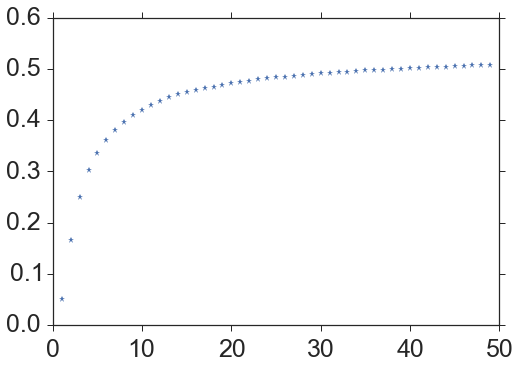

In [15]:
cv_means = []
for i in xrange(1, 50):
    tree = DecisionTreeRegressor(min_samples_leaf=i)
    cv_means.append( cross_val_score(tree, Xtest, ytest).mean())
plt.plot(xrange(1,50), cv_means, '*')

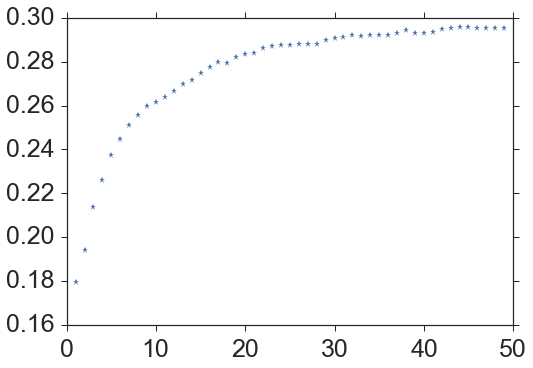

In [11]:
from sklearn.metrics import explained_variance_score
evs = []
for i in xrange(1, 50):
    tree = DecisionTreeRegressor(min_samples_leaf=i)
    tree.fit(Xtrain, ytrain)
    yhat = tree.predict(Xtest)
    evs.append(explained_variance_score(yhat, ytest))
plt.plot(xrange(1,50), evs, '*')


[-13, -9]
Explained variance score is:  0.178282044099


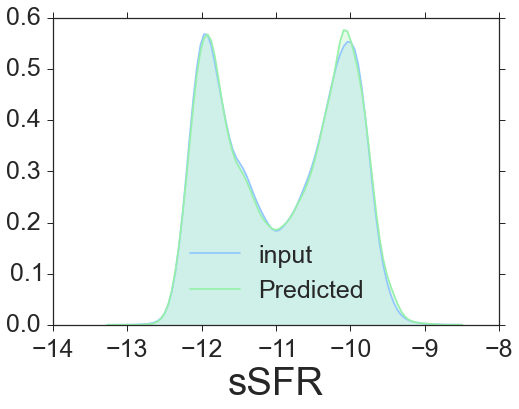

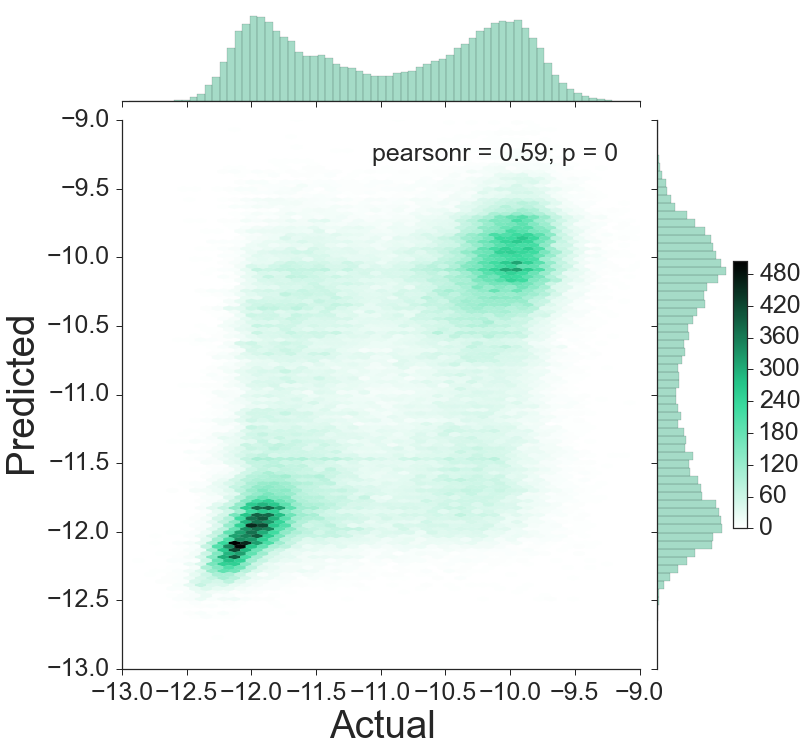

In [20]:
tree = DecisionTreeRegressor(min_samples_leaf=1)
tree.fit(Xtrain, ytrain)
sample_model(tree, 'increasing leaf sizes', Xtrain, ytrain, Xtest, ytest, -1)

In [9]:
d_test['pred'] = tree.predict(Xtest)
name = 'l o l'

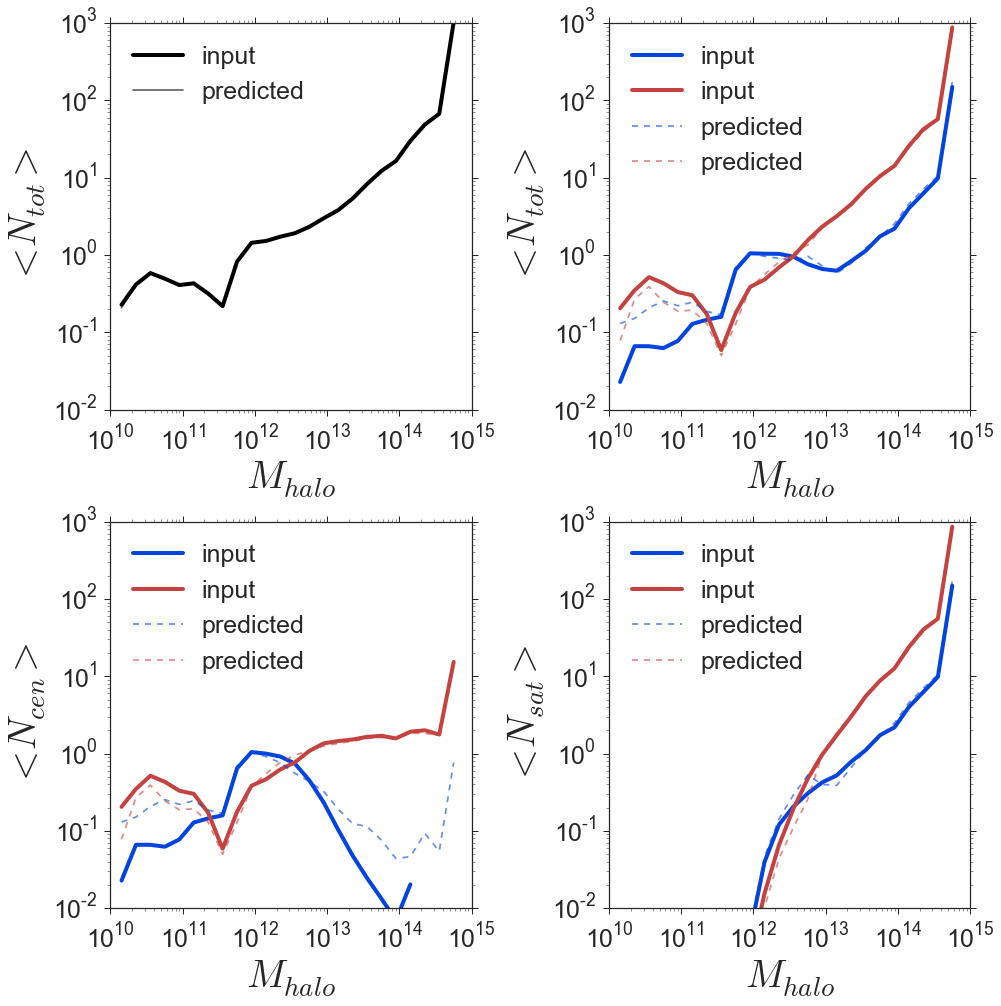

In [70]:
plot_HOD(d0, d_test, name, 9.0, 13.0)

Chi square is:  (0.6461693185798113, 0.99999880146856934)


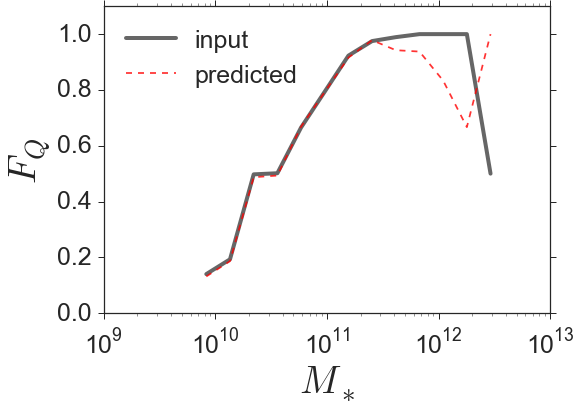

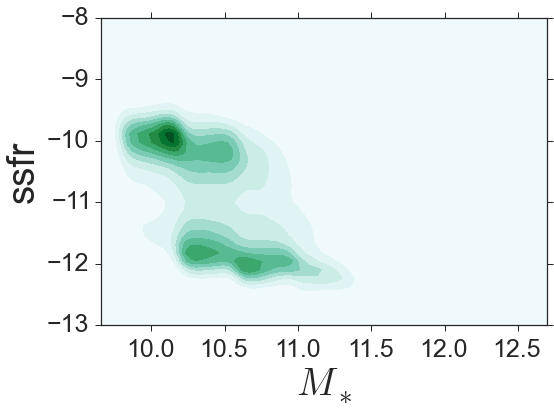

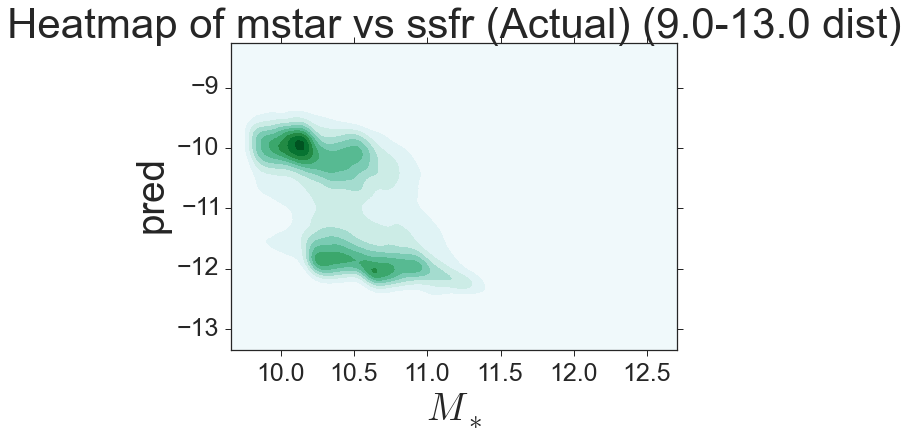

In [10]:
plot_p_red(10**d_test['mstar'].values, d_test['ssfr'], d_test['pred'], '9.0-13.0 dist')

0th bin
chi square is: (4.5684766143856947, 0.99999481055428274)
1th bin
chi square is: (27.603452809732143, 0.2771200427297274)


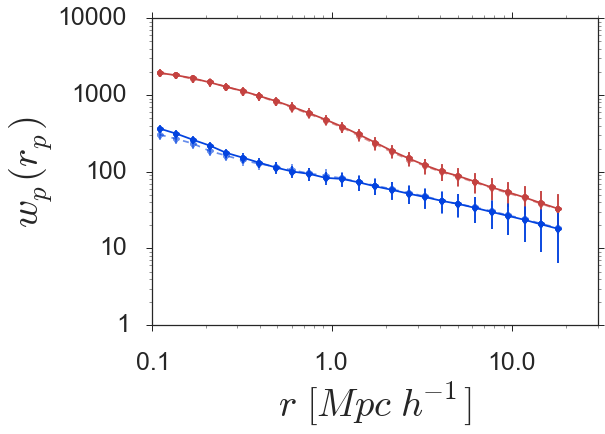

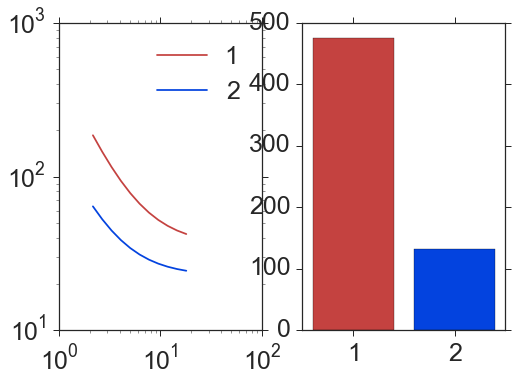

0th bin
chi square is: (47.252593610472942, 0.0031199557092229536)
1th bin
chi square is: (41.227921180784733, 0.015722819755743592)
2th bin
chi square is: (98.052545429640659, 6.4413372576296741e-11)


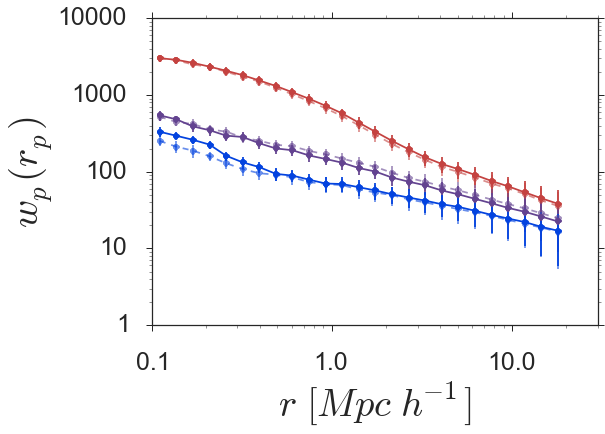

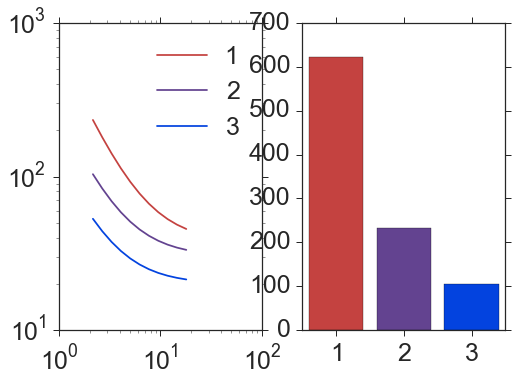

0th bin
chi square is: (120.74379109424831, 7.1504789570789794e-15)
1th bin
chi square is: (41.399903084879845, 0.015050074901886692)
2th bin
chi square is: (60.774733516466135, 4.9615779681271299e-05)
3th bin
chi square is: (211.93874383336487, 5.0233587911344589e-32)


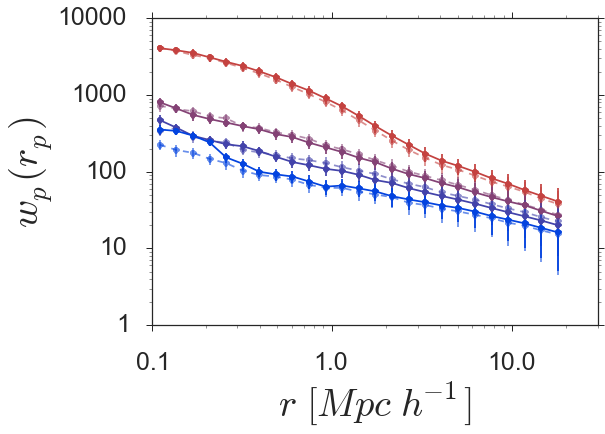

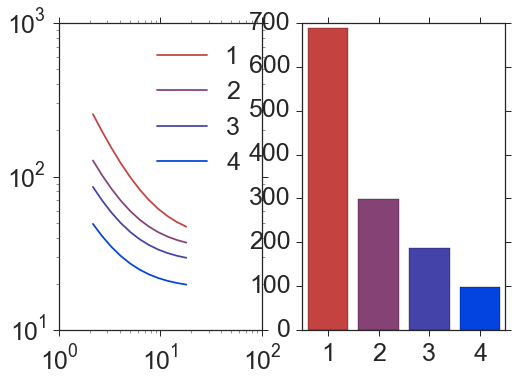

In [72]:
N_splits = 4
for i in xrange(1, N_splits):
    desc = name + " (" + str(i+1) + ")"
    actual_xis, actual_cov, pred_xis, pred_cov = wprp_comparison(d_test, desc, i)
    plot_wprp(actual_xis, actual_cov, pred_xis, pred_cov, desc, i)

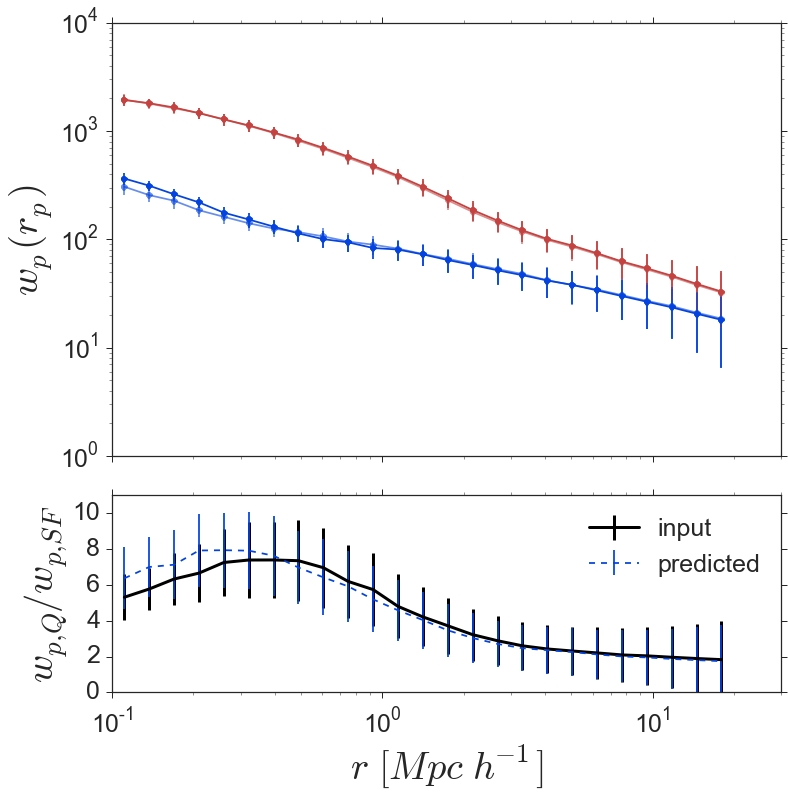

In [7]:
correlation_ratio(d_test, 'leafsize=1')

# other tree variants 

In [5]:
features = ['rhill_mass', 'mstar']
#Xtrain, ytrain, x_scaler, y_scaler = select_features(features, d_train, scaled=True)
Xtrain, ytrain = select_features(features, d_train, scaled=False)

Xtest, ytest = select_features(features, d_test, scaled=False)
#Xtest, ytest = x_scaler.transform(Xtest), y_scaler.transform(ytest)

In [6]:
from sklearn.tree import ExtraTreeRegressor

In [7]:
et = ExtraTreeRegressor()
et.fit(Xtrain, ytrain)
d_test['pred'] = et.predict(Xtest)

[-13, -9]
Explained variance score is:  0.174852847615


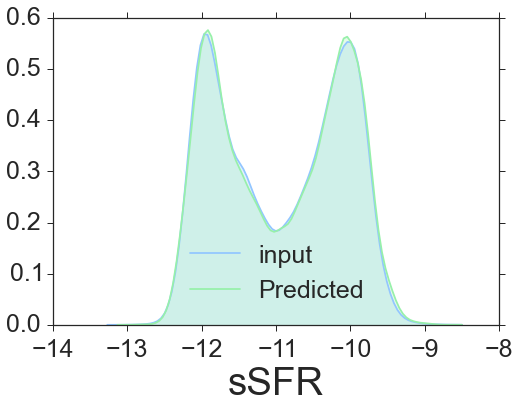

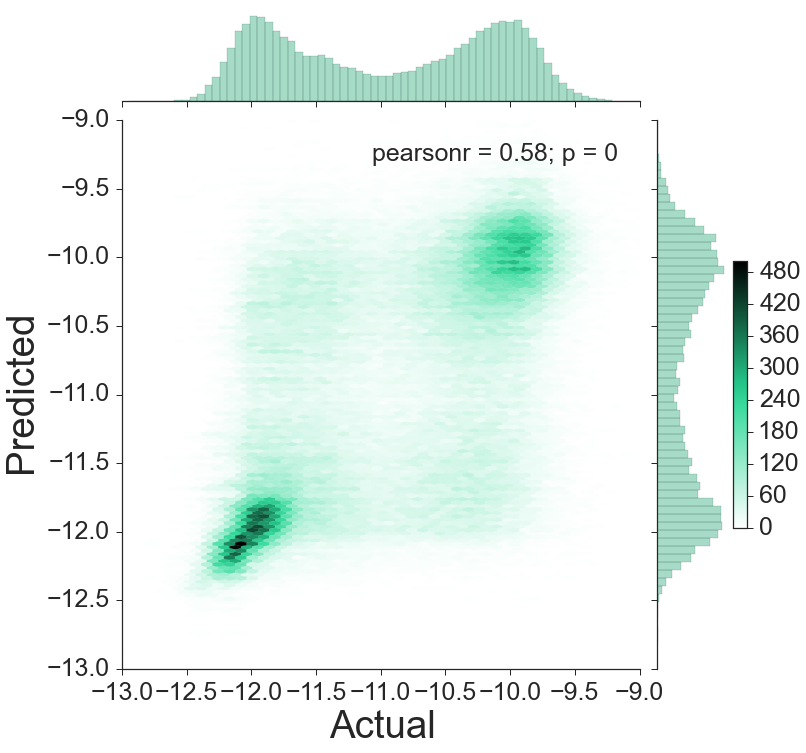

In [8]:
sample_model(et, 'extra tree', Xtrain, ytrain, Xtest, ytest, -1)

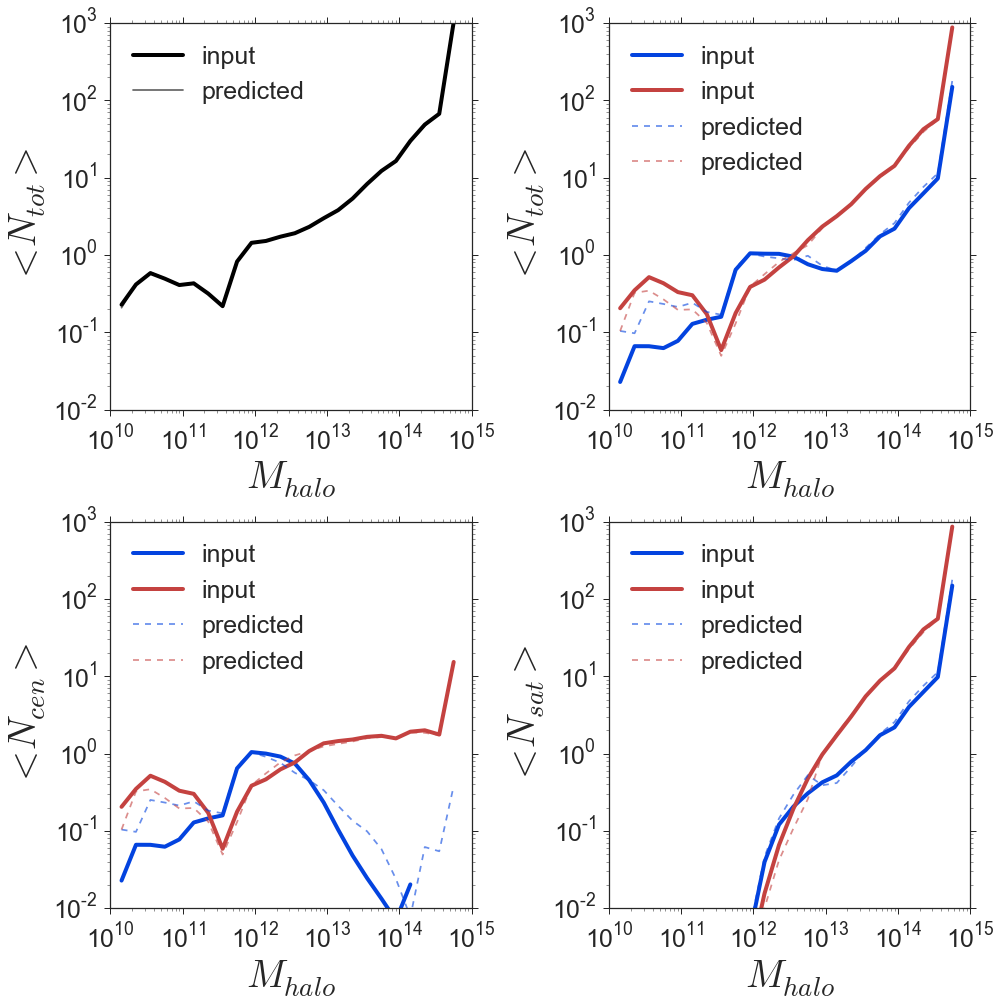

In [65]:
plot_HOD(d0, d_test, name, 9.0, 13.0)

Chi square is:  (0.50220506962797795, 0.99999971912509533)


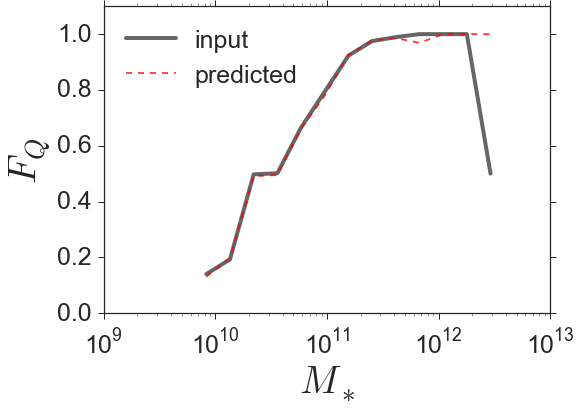

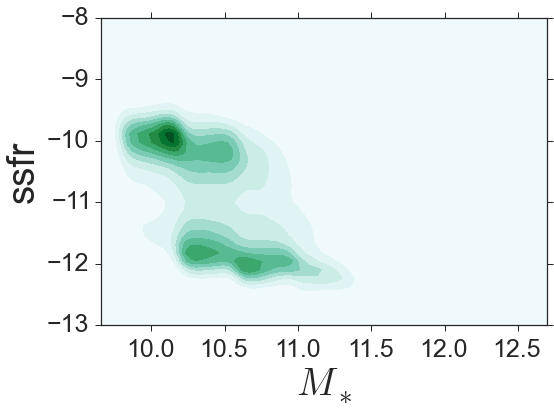

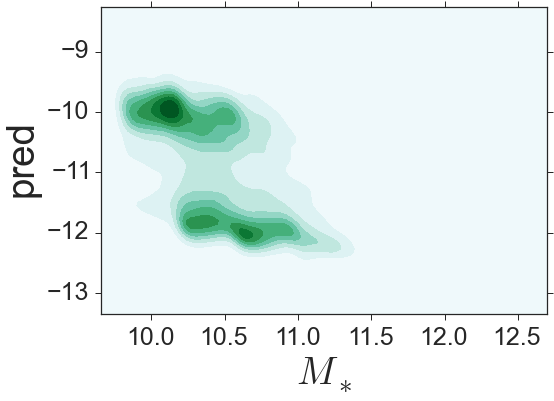

In [9]:
plot_p_red(10**d_test['mstar'].values, d_test['ssfr'], d_test['pred'], '9.0-13.0 dist')

0th bin
chi square is: (9.0703974247300216, 0.99744175160486115)
1th bin
chi square is: (16.517646561199552, 0.86849257340684538)


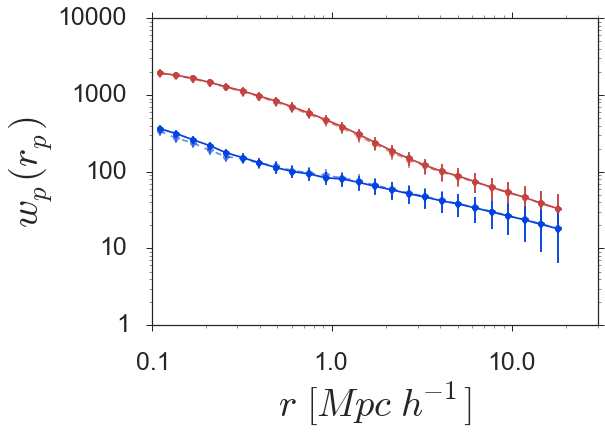

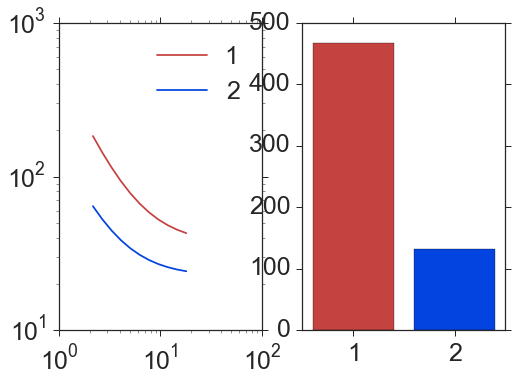

0th bin
chi square is: (66.391712911396851, 7.5902141731902904e-06)
1th bin
chi square is: (38.328983691285934, 0.032074424133136201)
2th bin
chi square is: (77.515886925560665, 1.5058959374150324e-07)


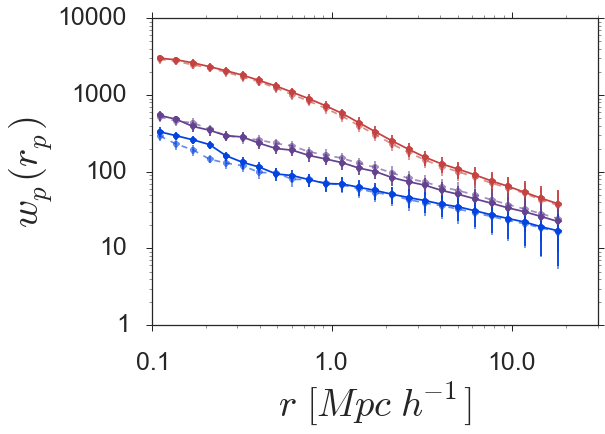

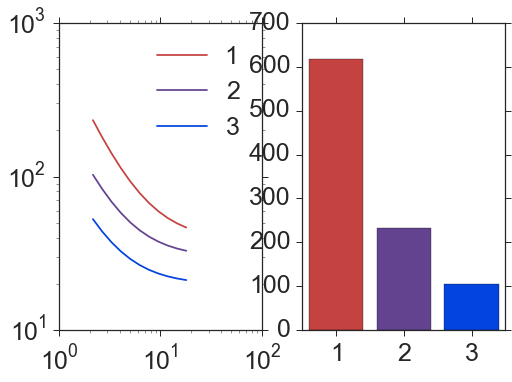

0th bin
chi square is: (169.08985586148202, 8.6914151720009566e-24)
1th bin
chi square is: (29.404603350603551, 0.20527460986320814)
2th bin
chi square is: (32.023632098366988, 0.12640771478786997)
3th bin
chi square is: (157.81281305232895, 1.1552142891524832e-21)


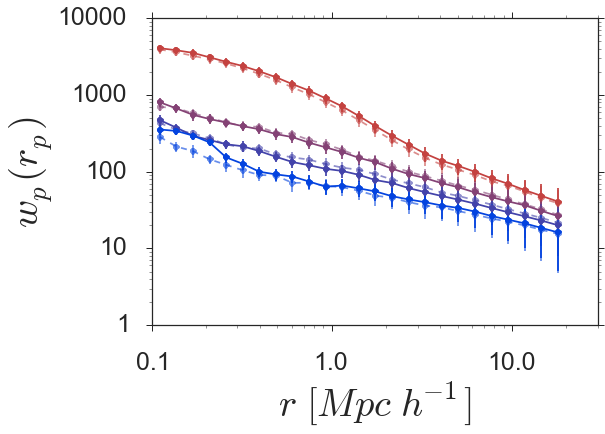

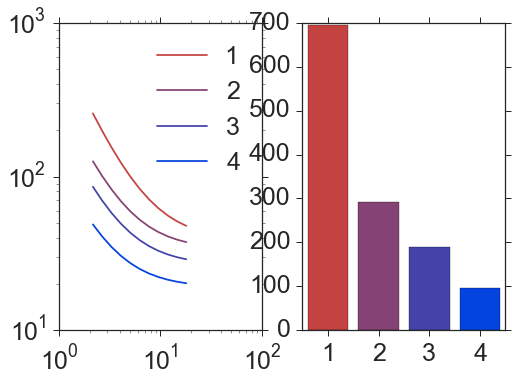

In [67]:
N_splits = 4
for i in xrange(1, N_splits):
    desc = name + " (" + str(i+1) + ")"
    actual_xis, actual_cov, pred_xis, pred_cov = wprp_comparison(d_test, desc, i)
    plot_wprp(actual_xis, actual_cov, pred_xis, pred_cov, desc, i)

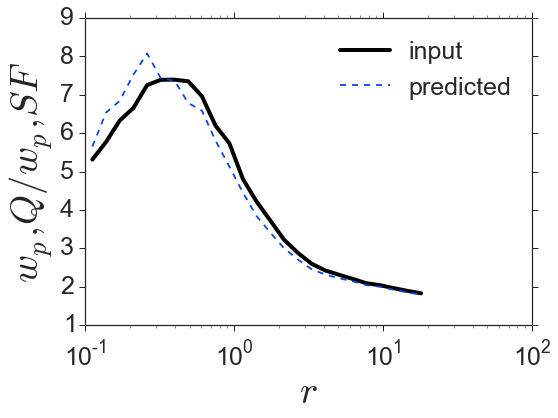

In [64]:
correlation_ratio(d_test, 'etr')

In [10]:
et = ExtraTreeRegressor()
et.fit(Xtrain, ytrain)
d_test['pred'] = et.predict(Xtest)

[-13, -9]
Explained variance score is:  0.167292148079


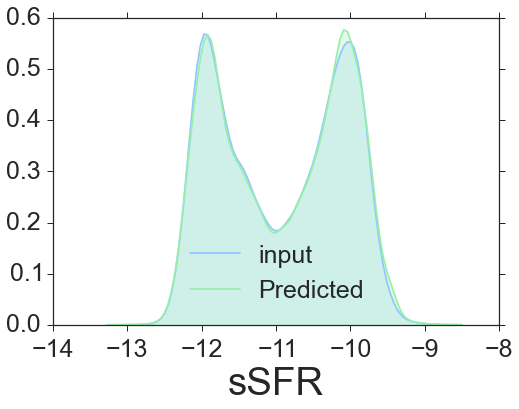

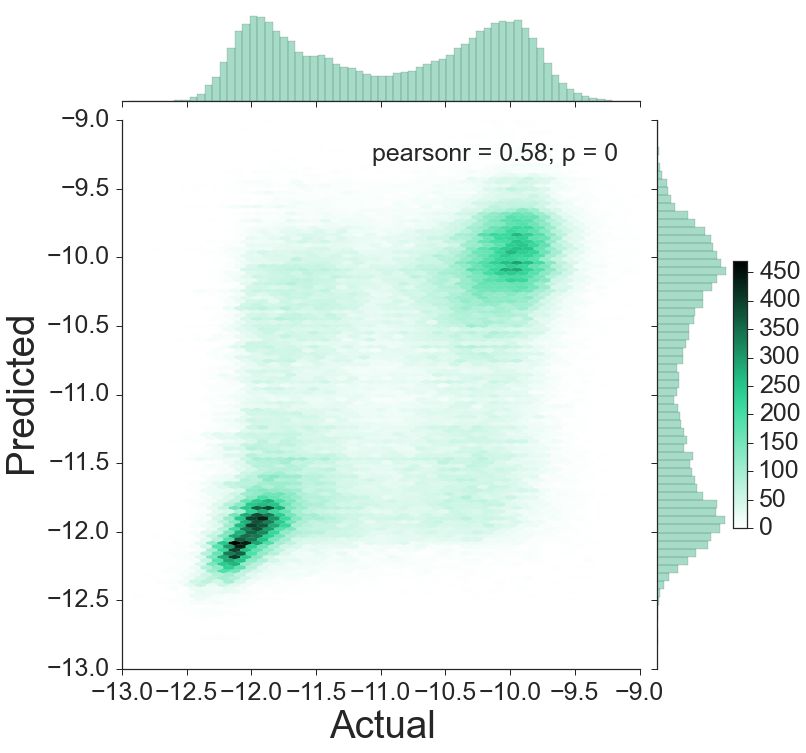

In [11]:
sample_model(et, 'extra tree', Xtrain, ytrain, Xtest, ytest, -1)

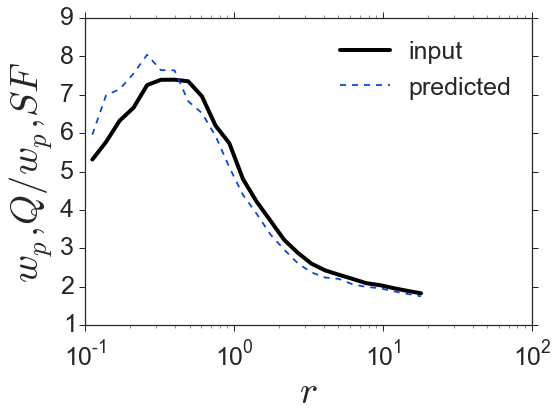

In [12]:
correlation_ratio(d_test, 'etr')

#random forests 

In [13]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

In [27]:
rfr = RandomForestRegressor(n_estimators=50)
rfr.fit(Xtrain, ytrain)
d_test['pred'] = rfr.predict(Xtest)

[-13, -9]
Explained variance score is:  0.260768022327


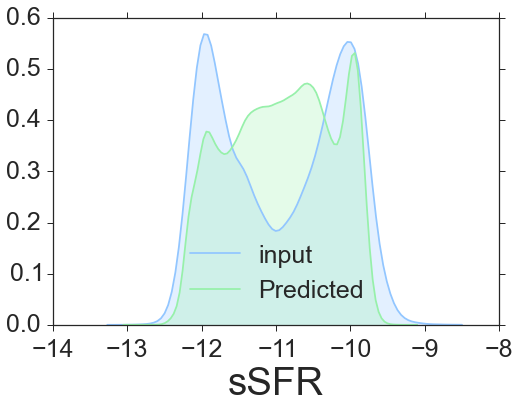

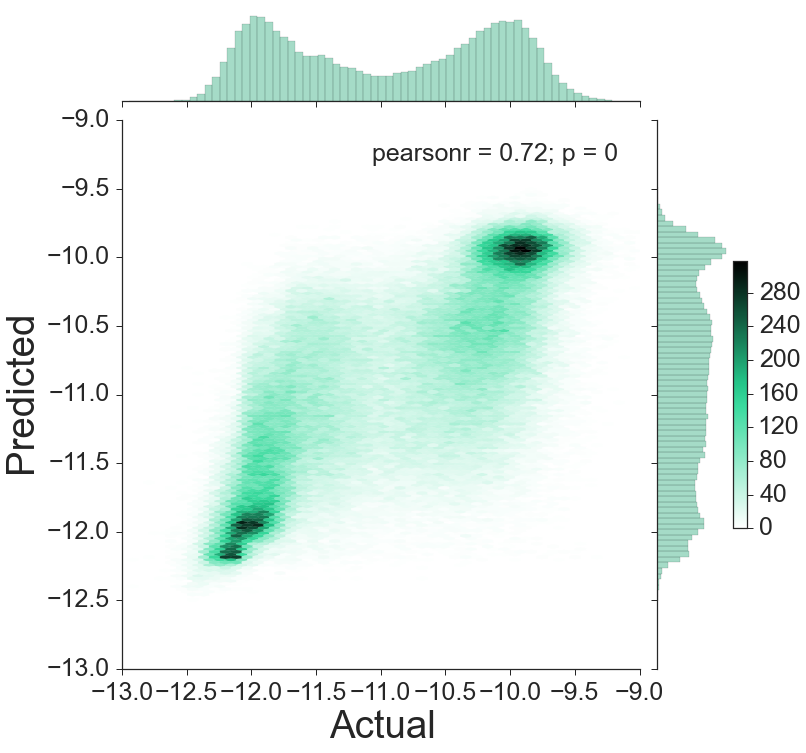

In [28]:
sample_model(rfr, 'random forest', Xtrain, ytrain, Xtest, ytest, -1)

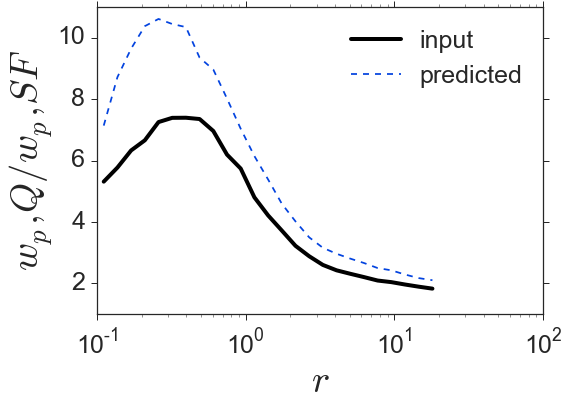

In [29]:
correlation_ratio(d_test, 'rfr')

In [17]:
etf = ExtraTreesRegressor()
etf.fit(Xtrain, ytrain)
d_test['pred'] = etf.predict(Xtest)

[-13, -9]
Explained variance score is:  0.241336141682


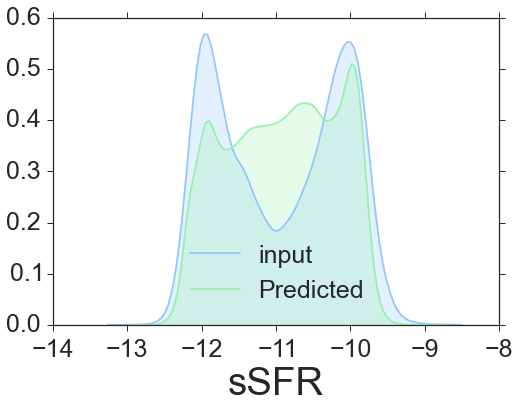

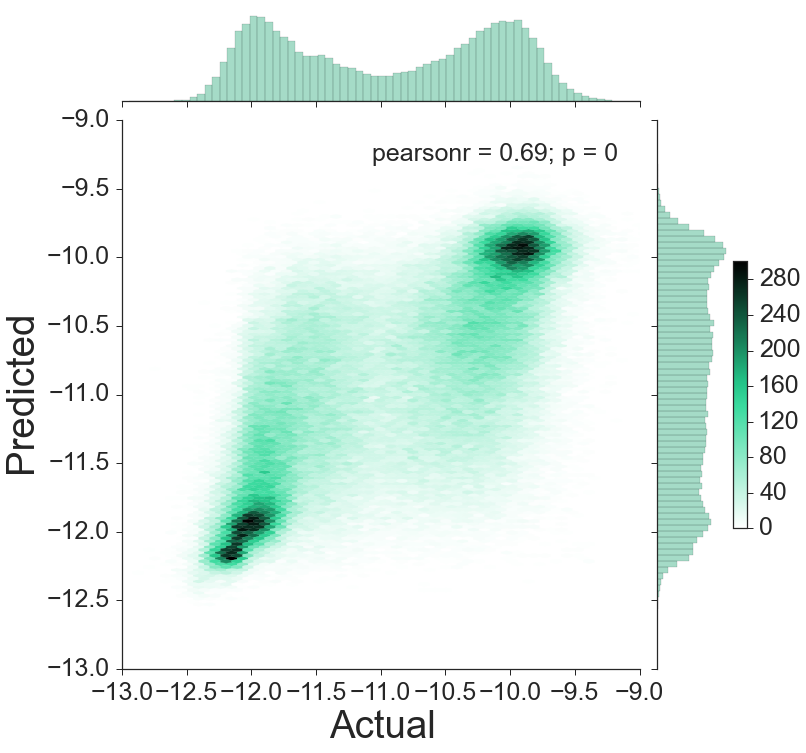

In [18]:
sample_model(etf, 'extra trees', Xtrain, ytrain, Xtest, ytest, -1)

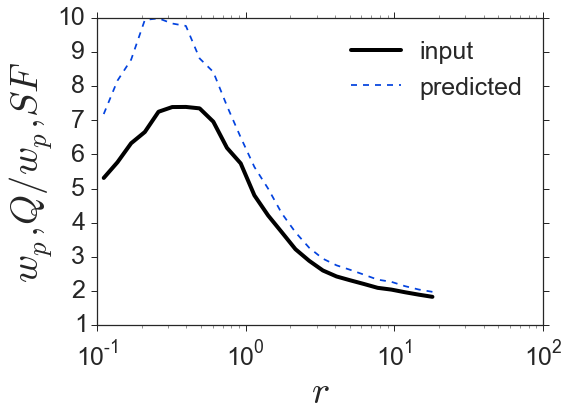

In [19]:
correlation_ratio(d_test, 'etf')

In [21]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(Xtrain, ytrain)
d_test['pred'] = ada.predict(Xtest)

[-13, -9]
Explained variance score is:  -0.947123865285


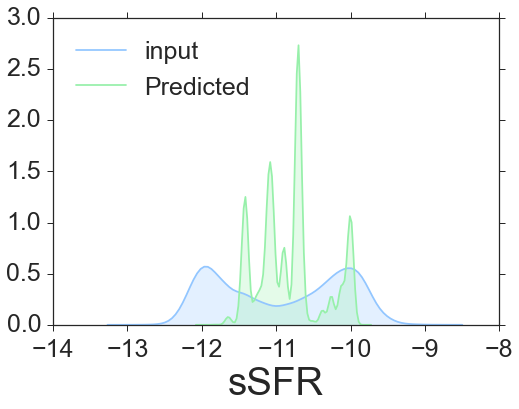

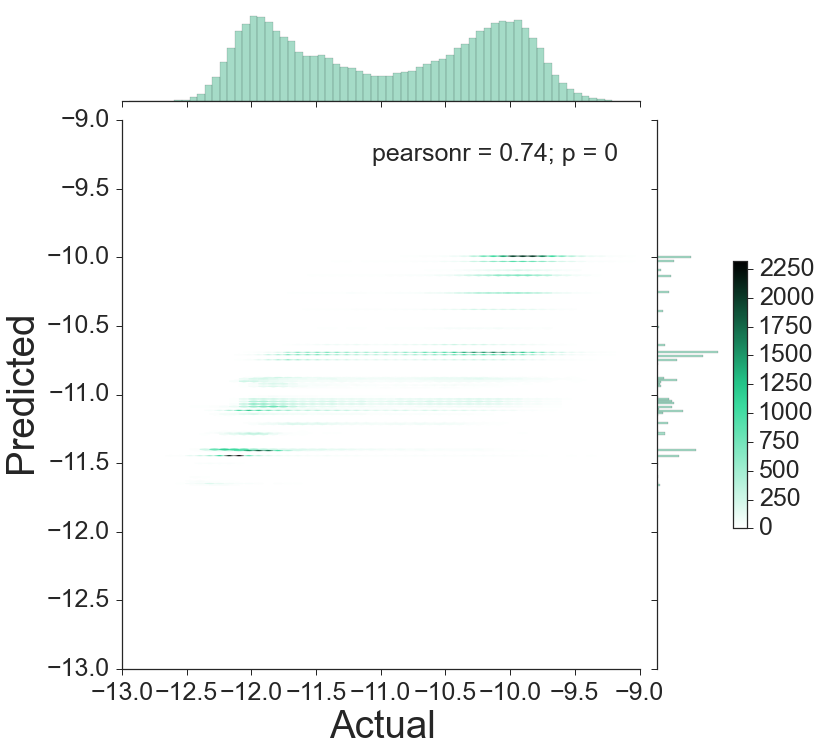

In [22]:
sample_model(ada, 'ada', Xtrain, ytrain, Xtest, ytest, -1)

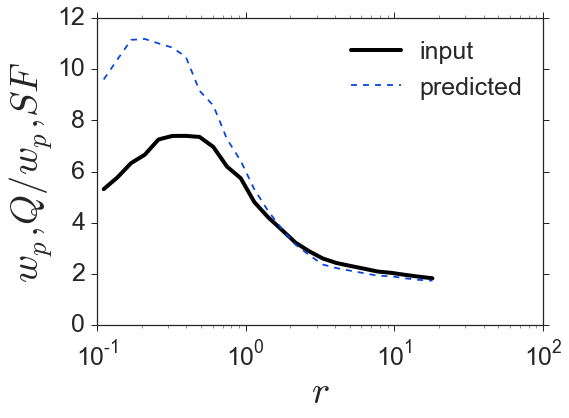

In [23]:
correlation_ratio(d_test, 'ada')

#nearest neighbors 

In [30]:
from  sklearn import neighbors

In [32]:
nn = 1
knn1u = neighbors.KNeighborsRegressor(n_neighbors=1, weights='uniform')
knn1u.fit(Xtrain, ytrain)
d_test['pred'] = knn1u.predict(Xtest)

[-13, -9]
Explained variance score is:  0.178163836905


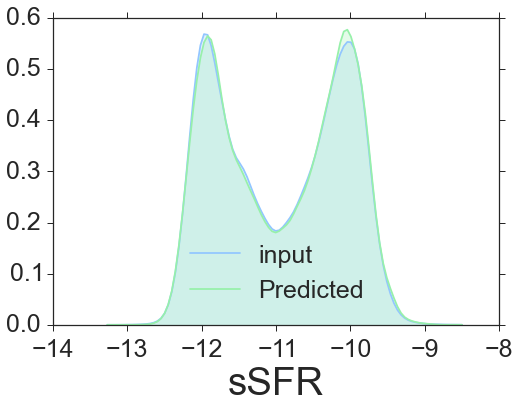

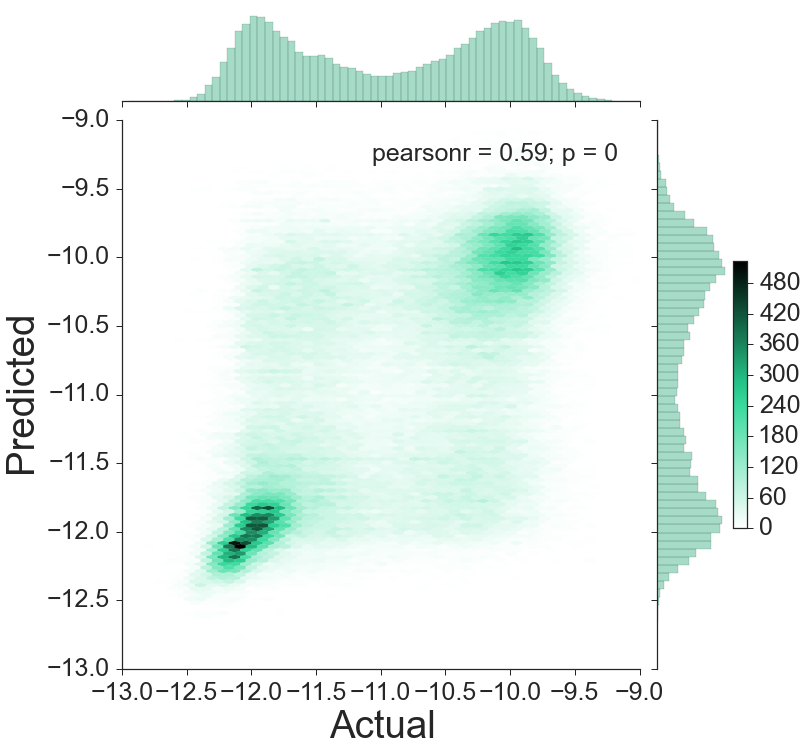

In [33]:
sample_model(knn1u, 'knn1u', Xtrain, ytrain, Xtest, ytest, -1)

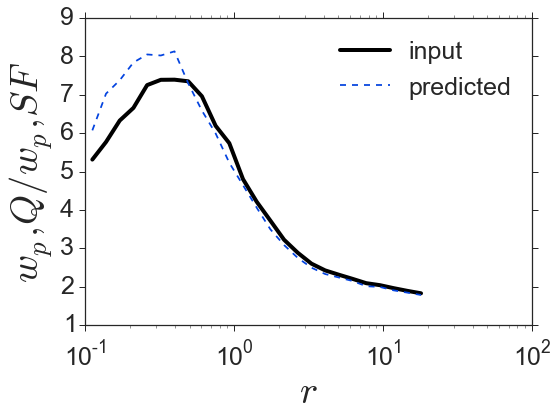

In [34]:
correlation_ratio(d_test, 'knn1u')

In [35]:
nn = 1
knn1d = neighbors.KNeighborsRegressor(n_neighbors=1, weights='distance')
knn1d.fit(Xtrain, ytrain)
d_test['pred'] = knn1d.predict(Xtest)

[-13, -9]
Explained variance score is:  0.178172466515


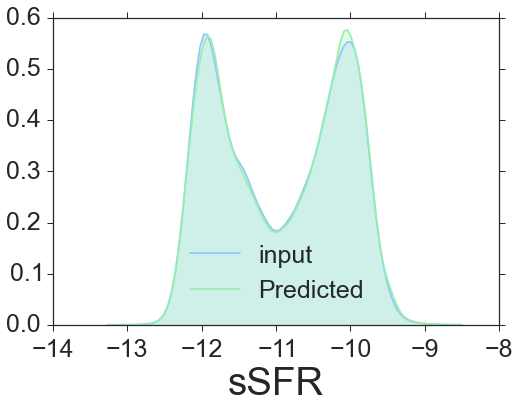

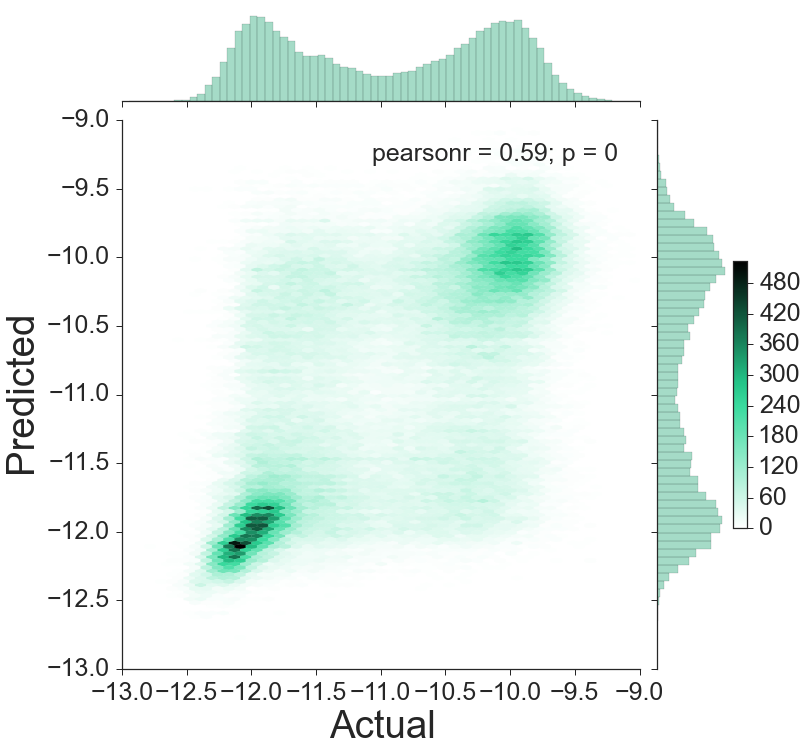

In [36]:
sample_model(knn1d, 'knn1d', Xtrain, ytrain, Xtest, ytest, -1)

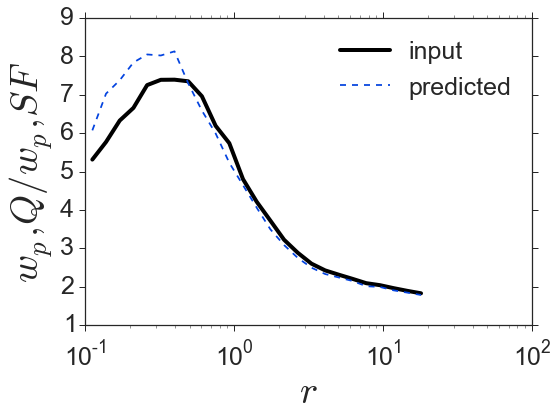

In [37]:
correlation_ratio(d_test, 'knn1d')

In [38]:
nn = 2
knn2u = neighbors.KNeighborsRegressor(n_neighbors=nn, weights='uniform')
knn2u.fit(Xtrain, ytrain)
d_test['pred'] = knn2u.predict(Xtest)

[-13, -9]
Explained variance score is:  0.223101169266


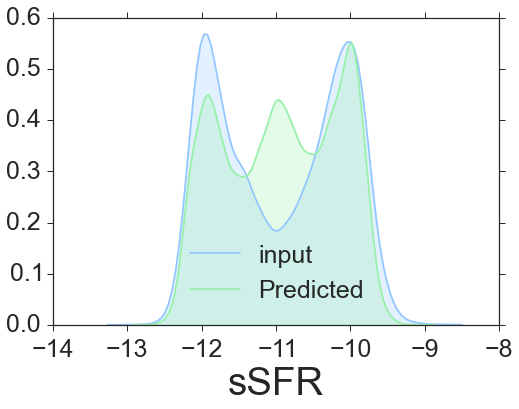

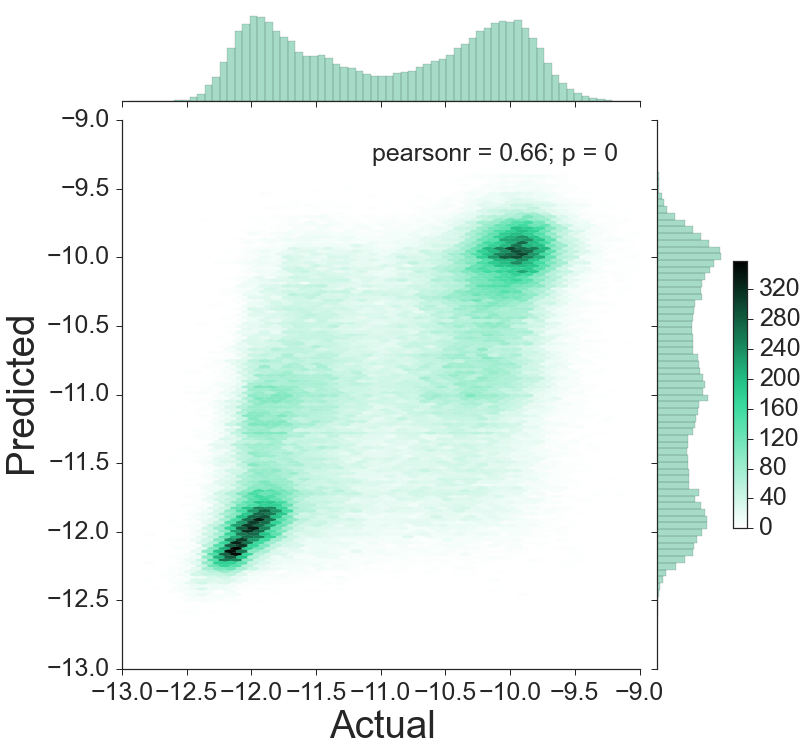

In [39]:
sample_model(knn2u, 'knn2u', Xtrain, ytrain, Xtest, ytest, -1)

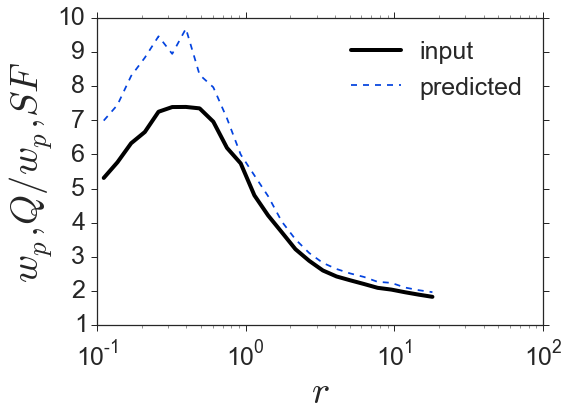

In [40]:
correlation_ratio(d_test, 'knn2u')

In [41]:
nn = 2
knn2d = neighbors.KNeighborsRegressor(n_neighbors=nn, weights='distance')
knn2d.fit(Xtrain, ytrain)
d_test['pred'] = knn2d.predict(Xtest)

[-13, -9]
Explained variance score is:  0.178164888434


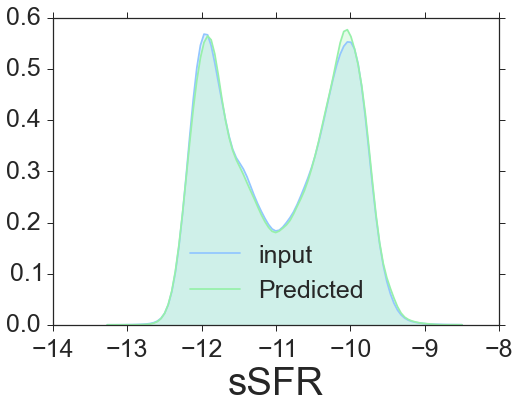

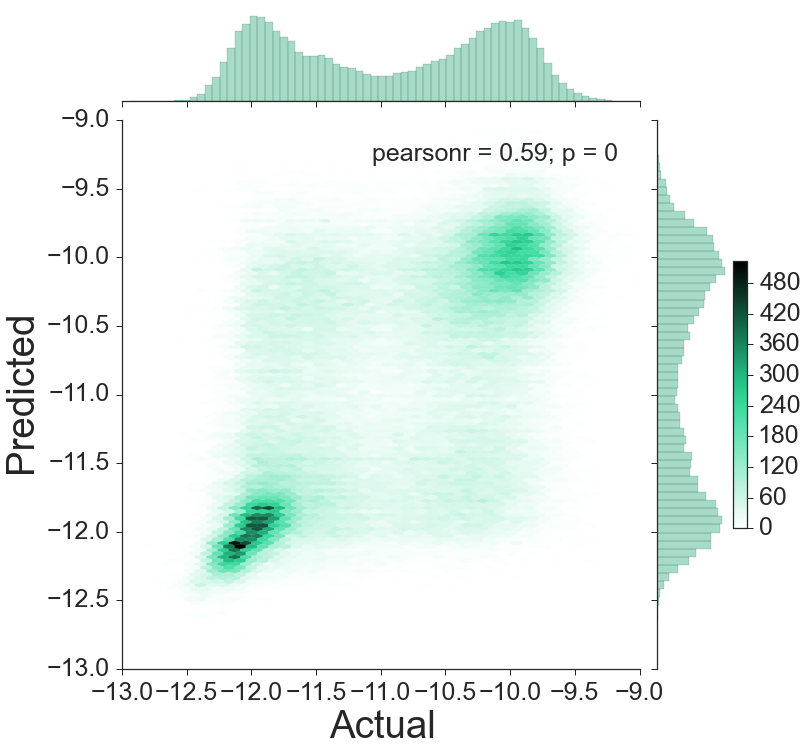

In [42]:
sample_model(knn1d, 'knn2d', Xtrain, ytrain, Xtest, ytest, -1)

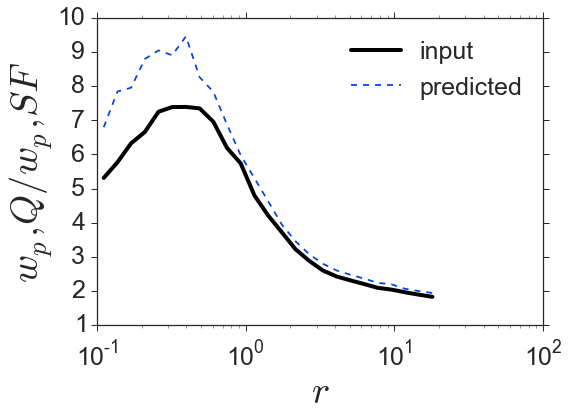

In [43]:
correlation_ratio(d_test, 'knn2d')

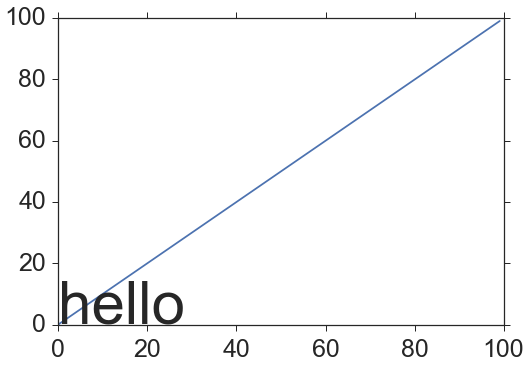

In [8]:
x = np.arange(100)
y = x
plt.plot(x,y)
plt.text(1,1, 'hello', fontsize=60)

In [6]:
plt.text?